Привет! меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:


<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ..
</div>
<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за  качественную работу, мне она понравилась!
- Я оставил некоторые советы надеюсь они будут полезными или интересными.
- Техника бутстрап применилась корректно, было проведено тщательное исследование и выбран правильный регион!
- Отправляю проект назад, чтобы у тебя была возможность задать вопросы, если они у тебя есть. Если их нет, то можешь просто отправить проект еще раз и я его зачту


# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [6]:
#импортируем все необходимые библиотеки и инструменты

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from scipy import stats as st

import warnings
warnings.filterwarnings("ignore")


<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты  на месте
</div>


In [7]:
#загрузим имеющиеся данные

geo_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [8]:
#чтобы не повторять код для каждого ДФ напишем функцию для получения информации о каждом

def info_df(df):
    print('ИНФОРМАЦИЯ О ДАТАФРЕЙМЕ')
    print()
    display(df.head(5))
    df.info()
    print()
    print('***Матрица корреляции***')
    print()
    display(df.corr())
    print()
    print('***Характеристики выборки***')
    print()
    display(df.describe())
    df.plot (y='product', kind='hist', bins=25)
    plt.title ('Рапределение объема запасов в скважинах')
    print()


<div class="alert alert-block alert-success">
<b>Успех:</b> Хороший помощник
</div>


ИНФОРМАЦИЯ О ДАТАФРЕЙМЕ



,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

***Матрица корреляции***



,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000



***Характеристики выборки***



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347



ИНФОРМАЦИЯ О ДАТАФРЕЙМЕ



,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

***Матрица корреляции***



,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000



***Характеристики выборки***



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408



ИНФОРМАЦИЯ О ДАТАФРЕЙМЕ



,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

***Матрица корреляции***



,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000



***Характеристики выборки***



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


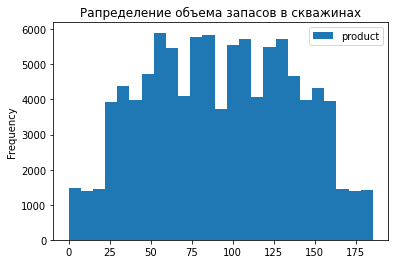

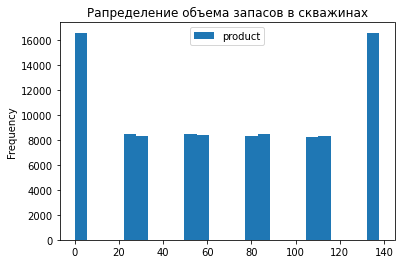

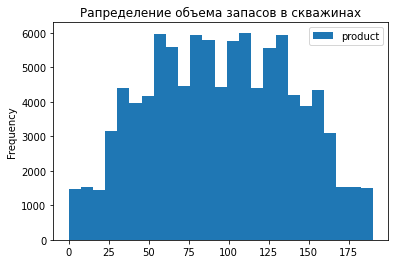

In [9]:
info_df(geo_0)
info_df(geo_1)
info_df(geo_2)

О имеющихся датафреймах можно сказать следующее. Каждый из них соответствует какому-то региону (получается, имеем данные из 3 регионов) и содержит по 10 000 значений, пропусков нет, типы данных корректны, нет выбросов в столбце `product`, все признаки количественные (не потребуется кодировка). Столбцы:

* id — уникальный идентификатор скважины;
* f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
* product — объём запасов в скважине (тыс. баррелей).


Во 2м датафрейме (geo_1) наблюдается сильнейшая корреляция между f2 и product, чего в других датафреймах нет. Также график распределения объёмов для 2 региона отличается от остальных двух, не являясь нормальным распределением. Посмотрим подробнее.

In [10]:
print(len(geo_1['product'].unique()))

12


Вероятно, что большая часть данных недоступна или утеряна. Также может быть, что дело в том, что данные синтетические по условию.  Пока что оставим всё так, посмотрим на результаты предсказаний.


<div class="alert alert-block alert-success">
<b>Успех:</b> Данные осмотрены хорошо
</div>


<div class="alert alert-block alert-info">
<b>Совет:</b>  Советую обратить внимание на библиотеки sweetviz и pandas_profiling помогут в проведении более тщательного EDA анализа. Исследовательский анализ можно делать и с помощью ручного вызова функций дефолтных библиотек. Данные библиотеки хороши для максимизации комфорта презентации результатов анализа бизнес-пользователям.  

Очень просты в использоовании, на вход кладется датафрейм: pandas_profiling.ProfileReport(df) 
</div>


## Обучение и проверка модели

In [11]:
#разобъём данные на обучающую и валидационные выборки 
#так как датафреймов несколько, напишем функцию для разбиения и применим к каждому

def split(df):
    features = df.drop(['id', 'product'], axis=1)
    target = df['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size = 0.25, random_state = 12345)
    return features_train, features_valid, target_train, target_valid

In [12]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = split(geo_0)
features_train_1, features_valid_1, target_train_1, target_valid_1 = split(geo_1)
features_train_2, features_valid_2, target_train_2, target_valid_2 = split(geo_2)

In [13]:
#масштаб данных не настолько сильно разнится, поэтому можем не масштабировать признаки, а сразу перейти к обучению моделей
#будем использовать Линейную регрессию
#аналогично прошлым пунктам напишем функцию для обучения моделей для каждого ДФ и получения оценок - среднего и RMSE, сводной таблицы реальных значений и предсказаний

model = LinearRegression()
def model_and_predict(features_train, features_valid, target_train, target_valid):
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    true_prediction = {'true_product': target_valid, #реальные объемы запасов
                       'predicted_product': predictions}  #предсказания объема запасов  
    table = pd.DataFrame(true_prediction, columns = ['true_product', 'predicted_product'])
    rmse = mean_squared_error(target_valid, predictions) ** 0.5
    mean_value = table['predicted_product'].mean()
    return table, mean_value, rmse, predictions

In [14]:
table_0, mean_0, rmse_0, predicted_valid_0 = model_and_predict(features_train_0, features_valid_0, target_train_0, target_valid_0)
table_1, mean_1, rmse_1, predicted_valid_1 = model_and_predict(features_train_1, features_valid_1, target_train_1, target_valid_1)
table_2, mean_2, rmse_2, predicted_valid_2 = model_and_predict(features_train_2, features_valid_2, target_train_2, target_valid_2)
display(table_0.head(5), table_1.head(5), table_1.head(5))
print('Средний запас предсказанного сырья в 0-м регионе:', mean_0, '\nСредний запас предсказанного сырья в 1-м регионе:', mean_1, '\nСредний запас предсказанного сырья в 2-м регионе:', mean_2)
print('RMSE модели для 0-го региона:', rmse_0, '\nRMSE модели для 1-го региона:', rmse_1, '\nRMSE модели для 2-го региона:', rmse_2)

,true_product,predicted_product
71751,10.038645,95.894952
80493,114.551489,77.572583
2655,132.603635,77.892640
53233,169.072125,90.175134
91141,122.325180,70.510088


,true_product,predicted_product
71751,80.859783,82.663314
80493,53.906522,54.431786
2655,30.132364,29.748760
53233,53.906522,53.552133
91141,0.000000,1.243856


,true_product,predicted_product
71751,80.859783,82.663314
80493,53.906522,54.431786
2655,30.132364,29.748760
53233,53.906522,53.552133
91141,0.000000,1.243856


Средний запас предсказанного сырья в 0-м регионе: 92.59256778438035 
Средний запас предсказанного сырья в 1-м регионе: 68.728546895446 
Средний запас предсказанного сырья в 2-м регионе: 94.96504596800489
RMSE модели для 0-го региона: 37.5794217150813 
RMSE модели для 1-го региона: 0.893099286775617 
RMSE модели для 2-го региона: 40.02970873393434


***Итог:***

Самое низкое значение RMSE получили для 1го региона, однако средний предсказанный запас для него самый низкий. Максимальное значение среднего запаса по предсказаниям получили для 2го региона, но для 0го значение не сильно ниже.  


<div class="alert alert-block alert-success">
<b>Успех:</b> Шаг проделан лаконично, все метрики посчитаны корректно
</div> 


## Подготовка к расчёту прибыли

In [37]:
#сохраним все ключевые значения для расчётов в отдельных переменных

REGIONAL_BUDGET = 10_000_000_000 #бюджет на разработку скважин в регионе (10 млрд рублей)
PRICE_OF_UNIT = 450_000 #цена за тысячу баррелей (за единицу продукта)
LOSS_PROBABILITY = 0.025 #вероятность убытков
WELLS_IN_REGION = 500 #количество исследуемых скважин в регионе
BEST_WELLS = 200 #количество лучших для разработки скважин

<div class="alert alert-block alert-info">
    
<b>Совет:</b> Константы принято записывать в ВЕРХНЕМ РЕГИСТРЕ =) Читем здесь https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#section-29
    
А большие значение можно записывать так: `450_000`.
</div> 

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Изменила регистр констант и формат записи больших чисел))
    Спасибо за все добавленные ссылки!)
</div>

In [38]:
#Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. 
#Поделим региональный бюджет на количество луших скважин(это будет бюджет на 1 скважину) и разделим на цену за тысячу баррелей
#то есть соотношение затраченного на скважину к тому, что с неё можно получить за 1 тыс.баррелей

sufficient_volume = REGIONAL_BUDGET / BEST_WELLS / PRICE_OF_UNIT
print('Достаточный объём сырья для безубыточной разработки новой скважины составляет', round(sufficient_volume, 2), 'тыс.баррелей')

Достаточный объём сырья для безубыточной разработки новой скважины составляет 111.11 тыс.баррелей


In [39]:
#Сравним полученный объём сырья со средним запасом в каждом регионе.

mean_volume = {'mean_volume': [92.593, 68.728, 94.965], 
               'required_volume': [111.11, 111.11, 111.11]}  
display(pd.DataFrame(mean_volume, columns = ['mean_volume', 'required_volume']))

,mean_volume,required_volume
0,92.593,111.11
1,68.728,111.11
2,94.965,111.11


По сводной таблице видно, что ни один регион по предсказанным средним объемам не подходит под рассчитанный уровень безубыточной добычи. Самые большие риски будут во 2м регионе(geo_1). Однако, стоит учесть, что в расчете учитывалось лишь количество скважин, но то, что они должны иметь самые большие объемы запасов, не учтено. Поэтому стоит сделать далее акцент на этом. 

<div class="alert alert-block alert-success">
<b>Успех:</b> Значение для безубыточной разработки посчитано верно, с выводом согласен  
</div>


## Расчёт прибыли и рисков 

In [40]:
#напишем функцию для подсчета прибыли в каждом регионе с учетом того, что выбираются 200 лучших скважин (затраченный бюджет не учитывается)

def revenue(target, predictions):
    predictions_sorted = predictions.sort_values(ascending=False)
    selected_target = target[predictions_sorted.index][:BEST_WELLS]
    profit = selected_target.sum() * PRICE_OF_UNIT
    return profit - REGIONAL_BUDGET

<div class="alert alert-block alert-success">
<b>Успех:</b> Ф-ция для подсчета прибыли определена верно
</div>

In [41]:
#также напишем функцию для перевода данных к формату Series

def series(target, predictions):
    target = target.reset_index(drop=True)
    predictions = pd.Series(predictions)
    return target, predictions

In [42]:
target_valid_0, predicted_valid_0 = series(target_valid_0, predicted_valid_0)
target_valid_1, predicted_valid_1 = series(target_valid_1, predicted_valid_1)
target_valid_2, predicted_valid_2 = series(target_valid_2, predicted_valid_2)

In [43]:
#теперь при помощи написанной функции и процедуры bootstrap рассчитаем среднюю прибыль, 95%-й доверительный интервал и риск убытков.

def bootstrap(target, predictions):
    
    state = np.random.RandomState(12345)
    
    values = []
    
    for i in range(1000):
        target_subsample = target.sample(n = WELLS_IN_REGION, replace=True, random_state=state)
        pred_subsumple = predictions[target_subsample.index]
        values.append(revenue(target_subsample, pred_subsumple))
        
    values = pd.Series(values)
    mean_revenue = int(values.mean())
    lower = int(values.quantile(q=0.025))
    upper = int(values.quantile(q=0.975))
    risk = int((len(values[values < 0]) / len(values)) * 100)
    return mean_revenue, lower, upper, risk

<div class="alert alert-block alert-success">
<b>Успех:</b> С бутстрапом тоже все в порядке, метрики считаются верным образом!  
</div>

In [44]:
mean_revenue_0, lower_0, upper_0, risk_0  = bootstrap(target_valid_0, predicted_valid_0)
mean_revenue_1, lower_1, upper_1, risk_1  = bootstrap(target_valid_1, predicted_valid_1)
mean_revenue_2, lower_2, upper_2, risk_2  = bootstrap(target_valid_2, predicted_valid_2)

In [45]:
print('Средняя прибыль 200 лучших скважин региона_0:', mean_revenue_0)
print('Средняя прибыль 200 лучших скважин региона_1:', mean_revenue_1)
print('Средняя прибыль 200 лучших скважин региона_2:', mean_revenue_2)

Средняя прибыль 200 лучших скважин региона_0: 425938526
Средняя прибыль 200 лучших скважин региона_1: 515222773
Средняя прибыль 200 лучших скважин региона_2: 435008362


In [46]:
print('95% доверительный интервал для средней прибыли 200 лучших скважин региона_0', 'от', lower_0, 'до', upper_0)
print('95% доверительный интервал для средней прибыли 200 лучших скважин региона_1', 'от', lower_1, 'до', upper_1)
print('95% доверительный интервал для средней прибыли 200 лучших скважин региона_2', 'от', lower_2, 'до', upper_2)

95% доверительный интервал для средней прибыли 200 лучших скважин региона_0 от -102090094 до 947976353
95% доверительный интервал для средней прибыли 200 лучших скважин региона_1 от 68873225 до 931547591
95% доверительный интервал для средней прибыли 200 лучших скважин региона_2 от -128880547 до 969706954


In [47]:
print('Риск убытков региона_0:', risk_0, '%')
print('Риск убытков региона_1:', risk_1, '%')
print('Риск убытков региона_2:', risk_2, '%')

Риск убытков региона_0: 6 %
Риск убытков региона_1: 1 %
Риск убытков региона_2: 6 %


**ВЫВОД:**

Риски убытка для каждого из 3-х регионов невелики, однако лучшим по этому показателю является регион под номером 1. Для него же определен самый узкий 95% доверительный интервал, а также самая высокая средняя прибыль на 200 лучших скважинах. Именно это делает этот регион наилучшим для разработки скважин.


**РЕЗЮМЕ ВСЕГО ПРОЕКТА:**

- Изучили предоставленные данные: 3 датасета, соответствующие 3м разным регионам добычи нефти. Целевым признаком для нас был столбец `product` - объём запасов в скважине (тыс. баррелей). Мы посмотрели на распределение этих объёмов. Какая-то предобработка данным не потребовалась, так как не было пропусков, неверных типов данных или выбросов. Также порядок между значениями в столбцах не сильно критично различается, поэтому не было произведено масштабирование.

- Разбили каждый датафрейм на обучающую и валидационную выборки. Обучили модель - Линейную регрессию на данных для каждого региона. Получили средние запасы сырья в скважине по регионам, оценку RMSE для модели на каждом регионе.

- Выяснили, какой объем скважины в среднем по региону должен быть, чтобы регион считался безубыточным - 111.11 тыс.баррелей. Средние значение, полученные для каждого региона ранее, не подходили под понятие безубыточных, так как не учитывалось то, что добыча производится из 200 лучших скважин.

- При помощи процедуры bootstrap получили для каждого региона 95% доверительный интервал, среднюю прибыль и риски убытков. Тут уже была учтена необходимость исследовать лишь лучшие скважины. По результатам этого этапа исследования лучшим оказался регион_1. Он показал лучшие результаты по всем параметрам: 

    * самый высокий уровень средней прибыли: 515 222 773 рублей,
    * самый узкий доверительный интервал: от 68 873 225 до 931 547 591 рублей
    * самый низкий риск убытков: 1%


<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, проведено детальное исследование и был выбран правильный регион. 
Всегда приятно наблюдать подробный и структурированный итоговый вывод в конце работы!
</div>



<div class="alert alert-block alert-info">
<b>Совет: </b> Если интересно изучить тему бутстрапа глубже - я оставлю  ниже несколько интересных и полезных ссылок по теме:
        
1. "Bootstrap Hypothesis Testing in Statistics with Example" 
        
https://www.youtube.com/watch?v=9STZ7MxkNVg
        
2. "How to Calculate Bootstrap Confidence Intervals For Machine Learning Results in Python" 
        
https://machinelearningmastery.com/calculate-bootstrap-confidence-intervals-machine-learning-results-python/
        
3. "A Gentle Introduction to the Bootstrap Method" 

https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/
        
4. "An Introduction to the Bootstrap Method" 
        
https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60#:~:text=The%20basic%20idea%20of%20bootstrap,population%20mean)%20on%20sample%20data.&amp;text=A%20sample%20from%20population%20with%20sample%20size%20n
        
5. "Bootstrapping and Resampling in Statistics with Example" 
        
        
https://www.youtube.com/watch?v=O_Fj4q8lgmc
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован